# Drug Activity Prediction using Machine Learning
### Dataset: PPARγ Bioactivity Data

In this notebook, we aim to predict whether a molecule is active or inactive against the **PPARγ (Peroxisome Proliferator-Activated Receptor Gamma)** protein target. We'll use machine learning models and molecular features derived from SMILES strings.

In [ ]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

### Step 1: Load the Dataset

In [ ]:
df = pd.read_csv("PPARg_bioactivity_data_nM.csv")
print("Shape:", df.shape)
df.head()

Shape: (1445, 45)


,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,NaN,32233,[],CHEMBL658541,In vitro agonist efficacy against PPAR gamma a...,F,NaN,NaN,BAO_0000188,BAO_0000019,...,Homo sapiens,Peroxisome proliferator-activated receptor gamma,9606,NaN,NaN,EC50,nM,UO_0000065,NaN,63.0
1,NaN,32234,[],CHEMBL656170,In vitro agonistic activity against PPAR gamma...,F,NaN,NaN,BAO_0000188,BAO_0000019,...,Homo sapiens,Peroxisome proliferator-activated receptor gamma,9606,NaN,NaN,EC50,nM,UO_0000065,NaN,6.4
2,NaN,33386,[],CHEMBL658541,In vitro agonist efficacy against PPAR gamma a...,F,NaN,NaN,BAO_0000188,BAO_0000019,...,Homo sapiens,Peroxisome proliferator-activated receptor gamma,9606,NaN,NaN,EC50,nM,UO_0000065,NaN,51.0
3,NaN,33387,[],CHEMBL656170,In vitro agonistic activity against PPAR gamma...,F,NaN,NaN,BAO_0000188,BAO_0000019,...,Homo sapiens,Peroxisome proliferator-activated receptor gamma,9606,NaN,NaN,EC50,nM,UO_0000065,NaN,2.7
4,NaN,35892,[],CHEMBL658541,In vitro agonist efficacy against PPAR gamma a...,F,NaN,NaN,BAO_0000188,BAO_0000019,...,Homo sapiens,Peroxisome proliferator-activated receptor gamma,9606,NaN,NaN,EC50,nM,UO_0000065,NaN,40.0


### Step 2: Preprocessing

In [ ]:
df = df[["canonical_smiles", "standard_value"]]
df = df.dropna()

def label_activity(value):
    return 1 if value <= 1000 else 0

df["activity"] = df["standard_value"].apply(label_activity)

### Step 3: Feature Engineering (SMILES to Descriptors)

In [ ]:
def featurize(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    return [
        Descriptors.MolWt(mol),
        Descriptors.TPSA(mol),
        Descriptors.NumHDonors(mol),
        Descriptors.NumHAcceptors(mol),
        Descriptors.MolLogP(mol)
    ]

feature_names = ["MolWt", "TPSA", "HDonors", "HAcceptors", "LogP"]
features = df["canonical_smiles"].apply(featurize)

# Drop invalid molecules
mask = features.notnull()
df = df[mask]
X = pd.DataFrame(features[mask].tolist(), columns=feature_names)
y = df["activity"]

### Step 4: Train/Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 5: Model Training

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### Step 6: Evaluation

Accuracy: 0.8062283737024222

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.43      0.54        77
           1       0.82      0.94      0.88       212

    accuracy                           0.81       289
   macro avg       0.78      0.69      0.71       289
weighted avg       0.80      0.81      0.79       289



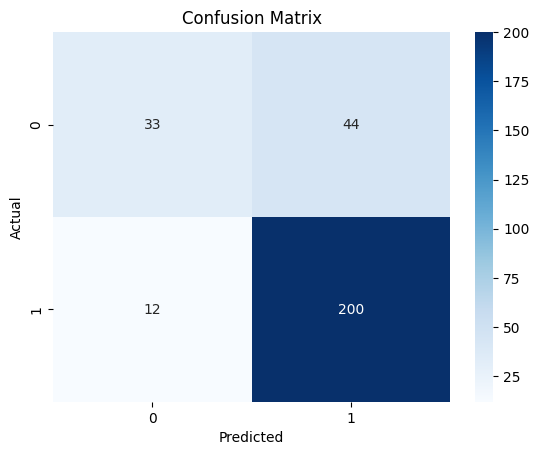

In [ ]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### Step 7: Feature Importance

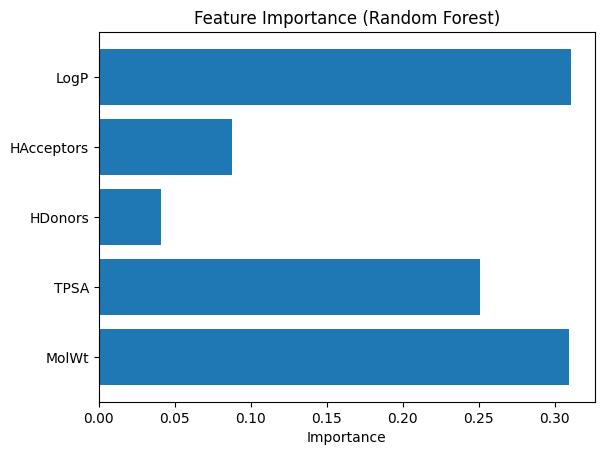

In [ ]:
importances = model.feature_importances_
plt.barh(feature_names, importances)
plt.xlabel("Importance")
plt.title("Feature Importance (Random Forest)")
plt.show()

### Step 8: Conclusion
- We built a simple ML pipeline to predict drug activity using molecular descriptors.
- This project shows how AI can help in early drug discovery stages.
- The approach is lightweight and easy to extend with more advanced features.

In [ ]:
# --- 🧪 STEP 10: Predict Activity for a New Compound ---

def predict_new_smiles(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        print("Invalid SMILES!")
        return
    features = [
        Descriptors.MolWt(mol),
        Descriptors.TPSA(mol),
        Descriptors.NumHDonors(mol),
        Descriptors.NumHAcceptors(mol),
        Descriptors.MolLogP(mol)
    ]
    prediction = model.predict([features])[0]
    print(f"Prediction for SMILES '{smiles}': {'Active' if prediction == 1 else 'Inactive'}")

# Example: Test on a known SMILES
predict_new_smiles("CC(=O)C1=CC=C=C1C(=O)O")  # Aspirin


Prediction for SMILES 'CC(=O)C1=CC=C=C1C(=O)O': Inactive


C:\Users\sachin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
